In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
chunks = pd.read_csv("../input/bosch-production-line-performance/train_numeric.csv.zip",chunksize=50000)

In [7]:
import xgboost as xgb

In [16]:
model = xgb.XGBClassifier(n_estimators=30)

In [18]:
ctr=0
for chunk in chunks:
    model.fit(chunk.drop(['Id','Response'],axis=1),chunk['Response'])
    ctr+=1
    print(ctr)

1
2
3
4
5
6
7
8


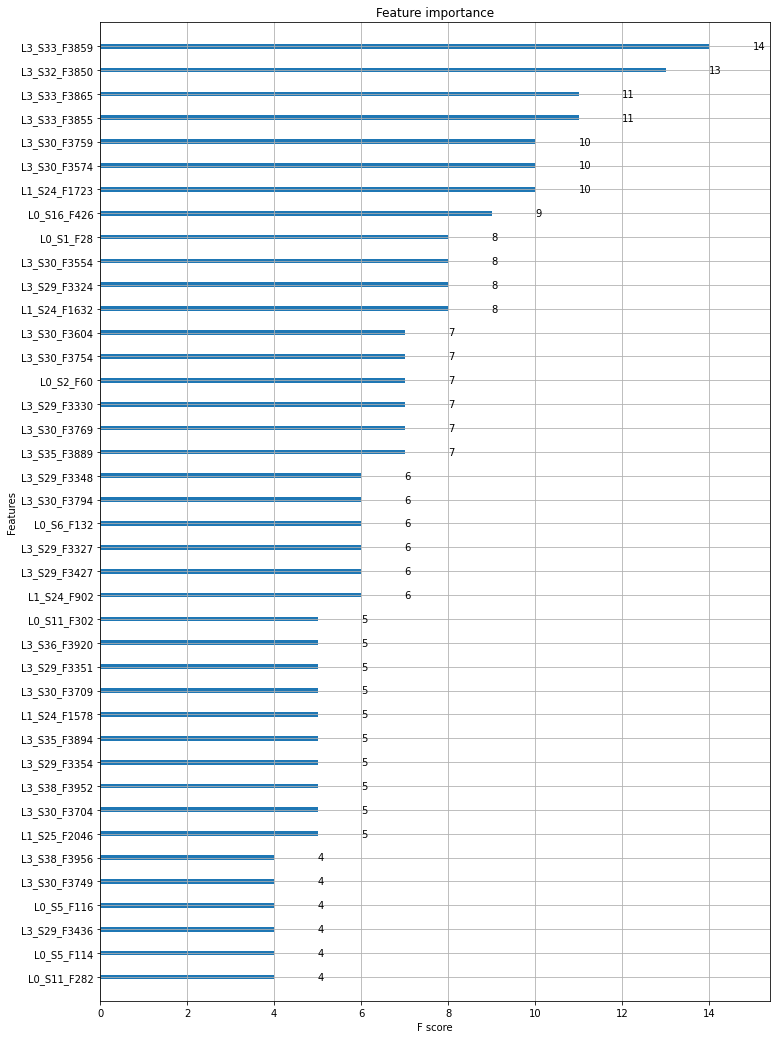

In [19]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model,ax =ax,max_num_features=40)

In [22]:
np.set_printoptions(suppress
                    =True)

In [32]:
imp = model.feature_importances_

In [33]:
name =model.get_booster().feature_names

In [41]:
pd.DataFrame({'feat':name,'impo':imp}).sort_values(by='impo',ascending=False)['feat'].head(35).values

array(['L3_S29_F3336', 'L3_S30_F3514', 'L0_S18_F449', 'L0_S12_F348',
       'L0_S0_F12', 'L3_S29_F3479', 'L1_S24_F1632', 'L0_S11_F314',
       'L0_S11_F294', 'L3_S29_F3339', 'L3_S30_F3809', 'L3_S29_F3407',
       'L3_S33_F3855', 'L0_S3_F100', 'L3_S33_F3873', 'L0_S10_F219',
       'L3_S29_F3376', 'L3_S30_F3554', 'L3_S30_F3629', 'L0_S2_F64',
       'L3_S33_F3857', 'L3_S36_F3920', 'L0_S0_F4', 'L0_S5_F114',
       'L3_S29_F3373', 'L3_S29_F3476', 'L3_S29_F3436', 'L3_S30_F3639',
       'L0_S9_F165', 'L3_S30_F3754', 'L0_S6_F132', 'L0_S11_F326',
       'L0_S4_F109', 'L0_S11_F298', 'L0_S22_F611'], dtype=object)